In [1]:
import sys
sys.path.insert(0,'/gamma_home/ozamiel/athena/vis/python')
import athena_read as ar
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d
import matplotlib
import os
#import cv2

In [9]:
#reading the data with hdf5
data = ar.athdf('./output_files_pr_cor_i/jet.out2.00000.athdf')
#print(data)
r = data['x1v']
phi = data['x2v']
z = data['x3v']
rho = [] ; press = []
vel1 = [] ; vel2 = [] ; vel3 = []
bcc1 = [] ; bcc2 = [] ; bcc3 = []
for i in range(0,195,10):
    print(f"{i:05d}")
    cur_file = ar.athdf('./output_files_pr_cor_i/jet.out2.{0}.athdf'.format(f"{i:05d}"))
    print(cur_file['Time'])
    rho.append(cur_file["rho"]) ; press.append(cur_file["press"])
    vel1.append(cur_file["vel1"]) ; vel2.append(cur_file["vel2"]) ; vel3.append(cur_file["vel3"])
    bcc1.append(cur_file["Bcc1"]) ; bcc2.append(cur_file["Bcc2"]) ; bcc3.append(cur_file["Bcc3"])

00000
0.0
00010
20.00278482588249
00020
40.0055696517676
00030
60.00018340542513
00040
80.00296823131546
00050
100.0057530572058
00060
120.00036681086333
00070
140.00315163673278
00080
160.00593646258832
00090
180.00055021621108
00100
200.00333504206662
00110
220.00611986792217
00120
240.00073362154492
00130
260.00351844741436
00140
280.0063032733395
00150
300.0009170270318
00160
320.0037018529569
00170
340.006486678882
00180
360.00110043257433
00190
380.00388525849945


In [3]:
#An example of how the data is accessible.
#print(rho[20][:,:,10]) #rho[time][z,phi,r]
#print(vel3[0][0,:,:,]) #vel[time][z,phi,r]
#print(rho[0][:,32,:], rho[0][:,0,:])


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [3]:
#printing info about the coordinates and number of cells on each.
print('r-bounds: {0} to {1}'.format(r[0], r[-1]))
print(r[25]/r[24], r[5]/r[4])
print('phi-bounds: {0} to {1}'.format(phi[0], phi[-1]))
print('z-bounds: {0} to {1}'.format(z[0], z[-1]))
print(len(rho[1][0]), '\n', len(z),'\n', len(r),'\n', len(phi))
#print(rho[1][1][2][3])
#print(r[0:10])
#print(r[1:11]-r[0:10])
#plt.plot(r[0:10])

r-bounds: 1.5136592967491287 to 148.66701844580186
1.0181551077577269 1.0181573201253566
phi-bounds: 0.012271846303085088 to 6.270913460876502
z-bounds: 0.048828125 to 99.951171875
256 
 1024 
 256 
 256


/powerapps/share/centos7/python-anaconda_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  import sys


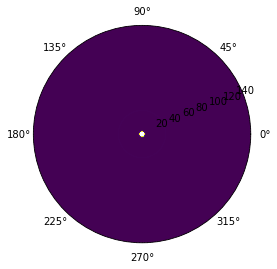

In [25]:
#Polar projection of velocity.
#fig, axs = plt.subplots(1,1,  figsize = (6,8),subplot_kw={'projection': 'polar'})
#fig.suptitle('Jet - 2D Map of the Density')
#axs.pcolor(phi,r,(vel1[5][z_const,:,:]**2 + vel2[5][z_const,:,:]**2)**0.5)

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.pcolor(phi, r, np.transpose(vel1[0][0,:,:]))
#plt.title('Total Velocity in R-Phi Plane, z=6 - Polar Projection')

#plt.savefig('z=6 Polar Projection')


0


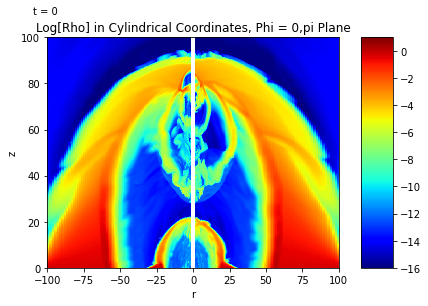

In [8]:
#fig = plt.figure()
#ax = fig.add_subplot((2,1))
#ax.pcolor(phi, r, np.transpose((vel1[5][z_const,:,:]**2 + vel2[5][z_const,:,:]**2)**0.5))
#plt.subplot(211)
#plt.pcolor(z,r, np.transpose(rho[3][:,0,:]))
#plt.pcolor(z,-r, np.transpose(rho[3][:,32,:]))
#plt.ylim(-10,10)

# Plotting the density from a side point of view.
fig = plt.figure()

for i in range(0,1):
    print(i)
    plt.pcolor(r,z, np.log10(rho[i][:,0,:]), vmin = -5.0, vmax = 1.0)
    plt.jet()
    plt.pcolor(-r,z, np.log10(rho[i][:,128,:]), vmin = -5.0, vmax = 1.0)
    plt.jet()
    plt.xlim(-100,100)
    plt.ylim(0,100)
    plt.title('Log[Rho] in Cylindrical Coordinates, Phi = 0,pi Plane')
    plt.xlabel('r') ; plt.ylabel('z')
    plt.text(-110,110,'t = {0}'.format(f"{20*i:d}"),backgroundcolor = 'white')
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    #plt.savefig('./output/rho/{0}'.format(f"{i:03d}"))
    #fig.clf()
    
#image_folder = './output'
#video_name = 'video.avi'

#images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
#images.sort()
#frame = cv2.imread(os.path.join(image_folder, images[0]))
#height, width, layers = frame.shape

#video = cv2.VideoWriter(video_name, 0, 1, (width,height))

#for image in images:
#    video.write(cv2.imread(os.path.join(image_folder, image)))

#cv2.destroyAllWindows()
#video.release()

In [30]:
fig = plt.figure()
for i in range(0,81):
    ax = fig.add_subplot(projection='polar')
    pc = ax.pcolor(phi, r, np.transpose(rho[0][i,:,:]), vmin = 0.01, vmax = 3.0)
    plt.ylim(0,50)
    plt.colorbar(pc)
    plt.title('Rho Polar Projection, z = {0}'.format(f"{i:d}"))
    plt.savefig('./output/rho/rho Polar Projection, z = {0}'.format(f"{i:02d}"))
    fig.clf()


/powerapps/share/centos7/python-anaconda_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

In [12]:
#Side angle of the pressure.

fig = plt.figure()

for i in range(0,20):
    print(i)
    plt.pcolor(r,z, np.log(press[i][:,0,:]), vmin = -3, vmax = 3)
    plt.pcolor(-r,z, np.log(press[i][:,128,:]), vmin = -3, vmax = 3)
    plt.xlim(-100,100)
    plt.ylim(0,100)
    plt.title('Log of Pressure in Cylindrical Coordinates, Phi = 0,pi Plane')
    plt.xlabel('r') ; plt.ylabel('z')
    plt.text(-110,110,'t = {0}'.format(f"{20*i:d}"),backgroundcolor = 'white')
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.savefig('./output/press/{0}'.format(f"{i:03d}"))
    fig.clf()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


<Figure size 432x288 with 0 Axes>

In [14]:
#Calculations of some values.
gam_fact = (1 + np.array(vel3)*np.array(vel3) + np.array(vel2)*np.array(vel2) + np.array(vel1)*np.array(vel1))**(0.5)
#gamma_add = 4/3
#b_sqr = (bcc2[0][0,:,:]/gam_fact)**2 / (rho[0][0,:,:]+(gamma_add/(gamma_add-1))*press[0][0,:,:])

KeyboardInterrupt: 

In [23]:
#Side angle of gamma factor.

fig = plt.figure()

for i in range(0,20):
    print(i)
    gam_fact = (1 + vel3[i]*vel3[i] + vel2[i]*vel2[i] + vel1[i]*vel1[i])**(0.5)
    plt.pcolor(r,z, np.log(gam_fact[:,0,:]), vmin = 0 , vmax = 4)
    plt.pcolor(-r,z, np.log(gam_fact[:,128,:]), vmin = 0 , vmax = 4)
    plt.xlim(-100,100)
    plt.ylim(0,100)
    plt.title('Log of Gamma Factor in Cylindrical Coordinates, Phi = 0,pi Plane')
    plt.xlabel('r') ; plt.ylabel('z')
    plt.text(-110,110,'t = {0}'.format(f"{20*i:d}"),backgroundcolor = 'white')
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.savefig('./output/gam_fact/{0}'.format(f"{i:03d}"))
    fig.clf()
    

In [23]:
#Side angle of magnetic field.

fig = plt.figure()

for i in range(0,20):
    print(i)
    plt.pcolor(r,z, bcc1[i][:,0,:], vmin = 0 , vmax = 1.5)
    plt.pcolor(-r,z, bcc1[i][:,128,:], vmin = 0 , vmax = 1.5)
    plt.xlim(-100,100)
    plt.ylim(0,100)
    plt.title('Magfield in Cylindrical Coordinates, Phi = 0,pi Plane')
    plt.xlabel('r') ; plt.ylabel('z')
    plt.text(-110,110,'t = {0}'.format(f"{20*i:d}"),backgroundcolor = 'white')
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.savefig('./output/B/{0}'.format(f"{i:03d}"))
    fig.clf()
    

In [27]:
fig = plt.figure()

for i in range(0,20):
    print(i)
    gam_fact = (1 + vel3[i]*vel3[i] + vel2[i]*vel2[i] + vel1[i]*vel1[i])**(0.5)
    ub = vel3[i]*bcc3[i] + vel2[i]*bcc2[i] + vel1[i]*bcc1[i]
    B2 = bcc3[i]*bcc3[i] + bcc2[i]*bcc2[i] + bcc1[i]*bcc1[i]
    h = 1 + (4/3)*press[i]/rho[i]
    b2 = (1/gam_fact*gam_fact)*(ub*ub + B2)
    sigm_m = b2/rho[i]
    sigm_r = b2/h
    print('sigma_m max = ', np.max(sigm_m))
    print('sigma_r max = ', np.max(sigm_r))
    plt.pcolor(r,z, sigm_m[:,0,:], vmin = 0, vmax = 50)
    plt.pcolor(-r,z, sigm_m[:,128,:], vmin = 0, vmax = 50)
    plt.xlim(-100,100)
    plt.ylim(0,100)
    plt.title('Michaels Sigma in Cylindrical Coordinates, Phi = 0,pi Plane')
    plt.xlabel('r') ; plt.ylabel('z')
    plt.text(-110,110,'t = {0}'.format(f"{20*i:d}"),backgroundcolor = 'white')
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.savefig('./output/other/sigm_m/{0}'.format(f"{i:03d}"))
    fig.clf()
    plt.pcolor(r,z, sigm_r[:,0,:], vmin = 0, vmax = 1.3)
    plt.pcolor(-r,z, sigm_r[:,128,:], vmin = 0, vmax = 1.3)
    plt.xlim(-100,100)
    plt.ylim(0,100)
    plt.title('Relativistic Sigma in Cylindrical Coordinates, Phi = 0,pi Plane')
    plt.xlabel('r') ; plt.ylabel('z')
    plt.text(-110,110,'t = {0}'.format(f"{20*i:d}"),backgroundcolor = 'white')
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.savefig('./output/other/sigm_r/{0}'.format(f"{i:03d}"))
    fig.clf()
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


<Figure size 432x288 with 0 Axes>

/powerapps/share/centos7/python-anaconda_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'r_vel, z = 0')

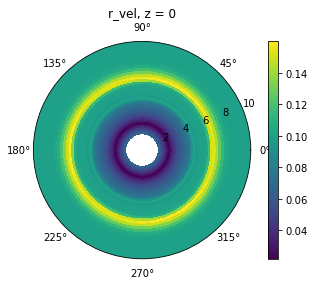

In [24]:
#Polar projetion of the pressure.
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
pc = ax.pcolor(phi, r, np.transpose(press[0][0,:,:]))
plt.ylim(0,10)
plt.colorbar(pc)
plt.title('r_vel, z = 0')
#plt.savefig('./output/vel/r_vel_z_0')
#fig.clf()

In [20]:
#Side angle of Gamma Factor
fig = plt.figure()
for i in range(1,12):
    gam_fact = (1 + vel3[i]*vel3[i] + vel2[i]*vel2[i] + vel1[i]*vel1[i])**(0.5)
    plt.pcolor(r,z, gam_fact[:,0,:])
    plt.pcolor(-r,z, gam_fact[:,128,:])
    plt.xlim(-100,100)
    plt.ylim(0,100)
    plt.title('Gamma Factor in Cylindrical Coordinates, Phi = 0,pi Plane')
    plt.xlabel('r') ; plt.ylabel('z')
    plt.text(-200,110,'t = {0}'.format(f"{i:02d}"),backgroundcolor = 'white')
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.savefig('./output/gam_fact/{0}'.format(f"{i:02d}"))
    fig.clf()


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [16]:
#1D plot of the different pressures in the simulation.
fig = plt.figure()
#ax = fig.add_subplot()
#plt.plot(r, press[0][0,0,:])
for i in range(1,12):
    plt.plot(r, (press[i][0,0,:]))
    plt.plot(r, (bcc2[i][0,0,:]*bcc2[i][0,0,:])/2)
    plt.plot(r, (bcc2[i][0,0,:]*bcc2[i][0,0,:])/(2) + press[i][0,0,:])
#plt.plot(r, (bcc2[11][0,0,:]*bcc2[11][0,0,:])/(2) + press[11][0,0,:],'.')
    plt.xlim(0,10)
    plt.ylim(0,0.16)
    plt.legend(('Thermal Pressure','Magnetic Pressure', 'Total Pressure'),loc = 'upper left')
    plt.title('Pressure, Phi = 0, t = {0}'.format(f"{i:02d}"))
    plt.savefig('./output/press/{0}'.format(f"{i:02d}"))
    fig.clf()
    
#plt.colorbar(pc)

<Figure size 432x288 with 0 Axes>

In [12]:
#1D plot of the velocity.
fig = plt.figure()
#ax = fig.add_subplot()
#plt.plot(r, press[0][0,0,:])
for i in range(1,12):
    plt.plot(r, (vel1[i][0,0,:]))
    plt.plot(r, vel2[i][0,0,:])
    plt.plot(r, vel3[i][0,0,:])
    plt.xlabel('r') ; plt.ylabel('velocity')
    plt.xlim(1.5,10)
    plt.ylim(0,13)
    plt.legend(('r_vel','phi_vel', 'z_vel'),loc = 'upper right')
    plt.title('Velocities, Phi = 0, t = {0}'.format(f"{i:02d}"))
    plt.savefig('./output/vel/{0}'.format(f"{i:02d}"))
    fig.clf()

<Figure size 432x288 with 0 Axes>

In [24]:
#1D plot of the velocity.
fig = plt.figure()
#ax = fig.add_subplot()
#plt.plot(r, press[0][0,0,:])
for i in range(1,12):
    plt.plot(r, (rho[i][0,0,:]))
    plt.xlabel('r') ; plt.ylabel('rho')
    plt.xlim(1.5,15)
    plt.ylim(0,1.25)
    #plt.legend(('r_vel','phi_vel', 'z_vel'),loc = 'upper right')
    plt.title('Rho, Phi = 0, t = {0}'.format(f"{i:02d}"))
    plt.savefig('./output/rho/{0}'.format(f"{i:02d}"))
    fig.clf()

<Figure size 432x288 with 0 Axes>